<a href="https://colab.research.google.com/github/jwoonge/ML-algorithms/blob/master/03_Linear_Regression_with_Multiple_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20141261 송제웅  
# 03 Linear Regression with Multiple Variables


## - function definition
[1] csv file read

In [15]:
import csv
import numpy as np
import matplotlib.pylab as plt
from google.colab import drive
import os

drive.mount('/content/gdrive')

def read_csv(path):
    ret = []
    f = open(path, newline="")
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        temp = []
        for i in range(len(row)):
            temp.append(float(row[i]))
        ret.append(temp)
    return ret

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


[2] Linear Model
$f_\theta(x,y,z) = \theta_0 + \theta_1x+\theta_2y+\theta_3z$

In [0]:
def linear_model(thetas, variables):
    ret = thetas[0]
    for i in range(len(thetas)-1):
        ret += thetas[i+1] * variables[i]
    return ret

[3] object function
  $J(\theta_0, \theta_1, \theta_2, \theta_3) = {1\over2m}\sum_{i=1}^m{(\theta_0 + \theta_1x_i + \theta_2y_i + \theta_3z_i -{h}_{i})^2}$  및 그 구현을 위한 linear model

In [0]:
def object_function(thetas, datas):
    ret = 0
    for i in range(len(datas)):
        ret += (linear_model(thetas,datas[i][0:3]) - datas[i][-1])**2
    ret /= 2*(len(datas))
    return ret

[4] gradient descent  
이전의 $\theta$ 값들 및 데이터 y_s로부터 새로운 $\theta$들을 도출한다    

$\theta_0(t+1) =\theta_0(t) -\alpha\frac{1}{m} \sum_{i=1}^m(f_\theta (x_i,y_i,z_i)−h_i)$  

$\theta_1(t+1) =\theta_1(t) -\alpha\frac{1}{m} \sum_{i=1}^m(f_\theta (x_i,y_i,z_i)−h_i)*x_i$  

$\theta_2(t+1) =\theta_2(t) -\alpha\frac{1}{m} \sum_{i=1}^m(f_\theta (x_i,y_i,z_i)−h_i)*y_i$  

$\theta_3(t+1) =\theta_3(t) -\alpha\frac{1}{m} \sum_{i=1}^m(f_\theta (x_i,y_i,z_i)−h_i)*z_i$  

In [0]:
def gradient_descent(thetas, datas, learning_rate=0.00001):
    thetas_new = []
    for i in range(len(thetas)):
        update = 0
        for j in range(len(datas)):
            if i == 0:
                mult = 1
            else:
                mult = datas[j][i-1]
            update += (linear_model(thetas,datas[j][0:3]) - datas[j][-1])/ len(datas) * mult
        thetas_new.append(thetas[i] - learning_rate*update)
    return thetas_new

[5] : 종료 조건인 convergence함을 판별하기 위한 boolean 함수  
theta 값 두 가지의 변동률이 convergence rate 보다 작아지면 convergence로 판별한다

In [0]:
def convergence(thetas_last, thetas_new, convergence_rate = 0.00001):
    count = 0
    for i in range(len(thetas_last)):
        if not thetas_last[i]==0:
            if np.abs((thetas_new[i] - thetas_last[i])/thetas_last[i]) <= convergence_rate:
                count += 1
        else:
            if np.abs(thetas_new[i]) <= convergence_rate:
                count += 1
    if count == len(thetas_last):
        return True
    else:
        return False

## - Main

csv file의 데이터를 읽어온다

In [0]:
data_train = read_csv('gdrive/My Drive/Colab Notebooks/ML assignments/03/data_train.csv')
data_test = read_csv('gdrive/My Drive/Colab Notebooks/ML assignments/03/data_test.csv')

반복문을 위한 초기 조건 설정  
$\theta_0$, $\theta_1$, $\theta_2$, $\theta_3$ 은 각각 0부터 gradient descent (func[4] )를 실행

In [0]:
t=0
thetas = [[0,0,0,0]]
error_train = [object_function(thetas[t],data_train)]
error_test = [object_function(thetas[t], data_test)]

gradient descent로 optimization을 하는 반복문  
1회의 반복이 한 번의 최적화 단계가 된다.  
convergence (func[5])하게 되면 중지한다.

In [0]:
while True:
    thetas_new = gradient_descent(thetas[t], data_train, 0.00001)
    thetas.append(thetas_new)
    t += 1
    error_train.append(object_function(thetas[t], data_train))
    error_test.append(object_function(thetas[t], data_test))
    #print(thetas_new, error_train[-1], error_test[-1])
    if convergence(thetas[t-1],thetas[t]):
        break
    if t-int(t/10000)*10000==0:
      print(t)

## - Result

  [1] Plot the estimated parameters using the training dataset


*   plot the estimated parameters There was an error rendering this math block at every iteration of gradient descent until convergence
*   the colors for the parameters There was an error rendering this math block should be black, red, green, blue, respectively
*   the optimization is performed using the training dataset ('data_train.csv')

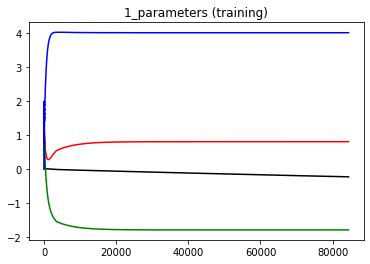

In [24]:
plt.title("1_parameters (training)")
thetas = np.transpose(thetas)
plt.plot(thetas[0], c='k')
plt.plot(thetas[1], c='r')
plt.plot(thetas[2], c='g')
plt.plot(thetas[3], c='b')
plt.show()

[2] Plot the training error using the training dataset
*   plot the training error $J (\theta_0, \theta_1, \theta_2, \theta_3)$at every iteration of gradient descent until convergence (in blue color)

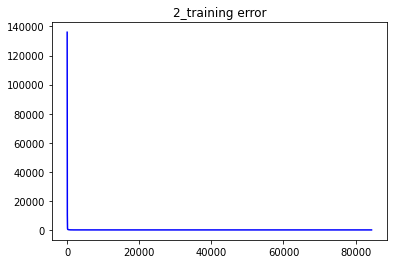

In [25]:
plt.title("2_training error")
plt.plot(error_train, c='b')
plt.show()

[3] Plot the testing error using the testing dataset at every iteration of gradient descent until convergence.

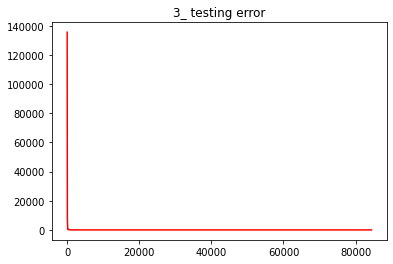

In [26]:
plt.title("3_ testing error")
plt.plot(error_test, c='r')
plt.show()